## Test 3: Complex Kernels
Idea: The main purpose of this script it to see how the kernel method works with complex data. That is that the RKHS feature space we
map our data to is now a complex vector space. That is finding the best hyperplane using SVM now in complex vector spaces.

But this code has a bug in it becuase the sklearn package needs to be adapted to work with complex data !!!!!!!!!!!!!

It is still useful as a reference to python packges and working with complex data.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm



In [14]:
# Generate some example complex-valued data
np.random.seed(0)
X_complex = np.random.randn(100, 2) + 1j * np.random.randn(100, 2)
y = np.logical_xor(X_complex.real > 0, X_complex.imag > 0)
#y=y.ravel()

In [15]:
# Define complex-valued kernel function
def complex_kernel(x1, x2):
    return np.dot(np.conj(x1).T, x2)



In [22]:
# Function to train SVM with complex-valued data and kernel
def train_svm_complex(X, y, kernel=complex_kernel):
    clf = svm.SVC(kernel=kernel)
    clf.fit(X, y)
    return clf


In [23]:
# Function to plot decision boundary
# Old Function For Plotting
def plot_decision_boundary_complex(X, y, clf):
    # Plot the real and imaginary parts of the data
    plt.scatter(X.real[y], X.imag[y], c='b', marker='o', label='Class 1')
    plt.scatter(X.real[~y], X.imag[~y], c='r', marker='x', label='Class 2')

    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    # Commenting out Bugs
    #Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    #Z = Z.reshape(xx.shape)
    #plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    plt.title('Decision Boundary with Complex Kernel')
    plt.xlabel('Real part')
    plt.ylabel('Imaginary part')
    plt.legend()
    plt.show()



In [25]:
# Function to plot Complex Data
def plot_decision_boundary_complex(X, y):
    # Plot the real and imaginary parts of the data
    plt.scatter(X.real[y], X.imag[y], c='b', marker='o', label='Class 1')
    plt.scatter(X.real[~y], X.imag[~y], c='r', marker='x', label='Class 2')

    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    # Commenting out Bugs
    #Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    #Z = Z.reshape(xx.shape)
    #plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    plt.title('Plotting Complex Valued Data')
    plt.xlabel('Real part')
    plt.ylabel('Imaginary part')
    plt.legend()
    plt.show()

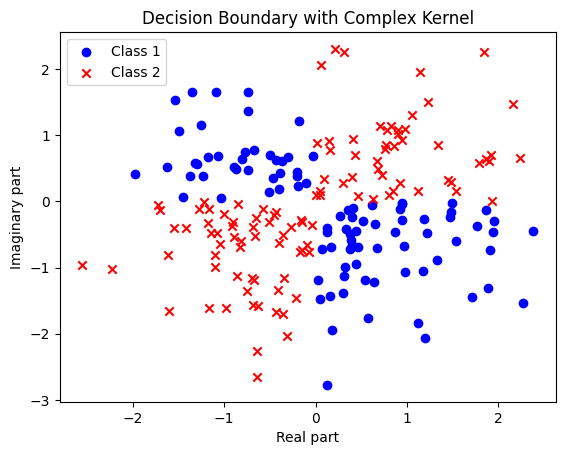

In [26]:
# Main function
if __name__ == "__main__":
    # Train SVM with complex-valued kernel
    # clf = train_svm_complex(X_complex, y)

    # Plot decision boundary
    plot_decision_boundary_complex(X_complex, y)
    #plot_decision_boundary_complex(X_complex, y, clf)

ValueError: y should be a 1d array, got an array of shape (100, 2) instead.

(200,)

In [2]:
# Trying to use a different package then sklearn that allows us to work with complex data

import skrf as rf


In [3]:

# Generate some example complex-valued data
np.random.seed(0)
X_complex = np.random.randn(100, 2) + 1j * np.random.randn(100, 2)
y = np.logical_xor(X_complex.real > 0, X_complex.imag > 0).astype(int)  # Convert to 0/1 labels

# Define complex-valued kernel function
def complex_kernel(x1, x2):
    return np.dot(np.conj(x1).T, x2)

# Function to train SVM with complex-valued data and kernel
def train_svm_complex(X, y, kernel=complex_kernel):
    clf = rf.learning.simple.SklearnClassifier(clf=rf.models.svm.SVC(kernel=kernel))
    clf.partial_fit(X, y, classes=np.unique(y))
    return clf

# Main function
if __name__ == "__main__":
    # Train SVM with complex-valued kernel
    clf = train_svm_complex(X_complex, y)

    # Print support vectors
    print("Support vectors:")
    print(clf.model.support_vectors_)

    # Print accuracy
    accuracy = clf.score(X_complex, y)
    print("Accuracy:", accuracy)


AttributeError: 'StaticInstances' object has no attribute 'learning'

In [12]:
## Another example with a different package
from creme import kernel
from creme import linear_model


ImportError: cannot import name 'kernel' from 'creme' (/home/lodewyk/.local/lib/python3.10/site-packages/creme/__init__.py)

In [5]:


# Generate some example complex-valued data
np.random.seed(0)
X_complex = np.random.randn(100, 2) + 1j * np.random.randn(100, 2)
y = np.logical_xor(X_complex.real > 0, X_complex.imag > 0).astype(int)  # Convert to 0/1 labels

# Define complex-valued kernel function
def complex_kernel(x1, x2):
    return np.dot(np.conj(x1).T, x2)

# Define a complex-valued SVM classifier
svm_complex = linear_model.PAClassifier(kernel=kernel.Kernel(complex_kernel))

# Train the SVM classifier
for xi, yi in zip(X_complex, y):
    svm_complex.fit_one(xi, yi)

# Print support vectors
print("Support vectors:")
print(svm_complex.n_support_vectors)

# Print accuracy
accuracy = svm_complex.score(X_complex, y)
print("Accuracy:", accuracy)

ImportError: cannot import name 'kernel' from 'creme' (/home/lodewyk/.local/lib/python3.10/site-packages/creme/__init__.py)

In [10]:
## Improve ments
import numpy as np
from creme import linear_model
from sklearn.metrics.pairwise import rbf_kernel



In [11]:
# Generate some example complex-valued data
np.random.seed(0)
X_complex = np.random.randn(100, 2) + 1j * np.random.randn(100, 2)
y = np.logical_xor(X_complex.real > 0, X_complex.imag > 0).astype(int)  # Convert to 0/1 labels

# Define a custom complex-valued kernel function
def complex_kernel(x1, x2):
    sigma = 1.0  # Hyperparameter for the RBF kernel
    x1_conj = np.conj(x1)
    x2_conj = np.conj(x2)
    rbf_value = rbf_kernel(np.array([[x1_conj.real, x1_conj.imag]]), np.array([[x2_conj.real, x2_conj.imag]]), gamma=1/(2 * sigma**2))
    return rbf_value[0][0]

# Define a complex-valued SVM classifier
svm_complex = linear_model.PAClassifier(kernel=complex_kernel)

# Train the SVM classifier
for xi, yi in zip(X_complex, y):
    svm_complex.fit_one(xi, yi)

# Print support vectors
print("Support vectors:")
print(svm_complex._model.support_vectors_)

# Print accuracy
accuracy = svm_complex.score(X_complex, y)
print("Accuracy:", accuracy)


TypeError: PAClassifier.__init__() got an unexpected keyword argument 'kernel'